In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing 
from keras import models, layers, optimizers

In [108]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [109]:
#404 examples and 13 varibales 
train_data.shape

(404, 13)

In [110]:
#15000 dollars 
train_labels[0]

15.2

In [111]:
#this features for this house 
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [112]:
#Data normalization 
#Desviacion estandar 
mean = train_data.mean(axis=0)
train_data = train_data  - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std


In [113]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    #Need a static number
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

In [114]:
#Define variables for k-fold cross validation 
k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 60
all_history = []

In [115]:
for i in range(k):
    print("Fold " , i)
    #Validation
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    #Train 
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0)

    #Build model 
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])

Fold  0
Fold  1
Fold  2
Fold  3


In [116]:
#Pass history from list to dataframe
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [117]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,19.432623,16.500248,12.623019,8.071503,4.997865,3.960719,3.522791,3.255019,3.060616,2.919699,3.070034,2.845851,2.766799,2.584319,2.512254,2.557443,2.411611,2.346546,2.415118,2.195735,2.207069,2.151316,2.202222,2.121833,2.082441,2.147078,2.102768,2.070236,2.022306,2.095315,2.019043,2.001077,2.040101,2.024726,1.972455,1.973142,1.951502,2.051283,2.027156,1.910368,1.972502,2.173806,1.976391,1.890857,1.984010,2.105683,1.895971,2.072596,1.977531,1.865311,1.871909,1.874344,2.007676,1.907316,1.857664,1.951321,1.908101,1.993498,1.894843,2.051125
1,19.787174,16.426062,12.162018,8.013361,5.576530,4.320800,3.858844,3.666237,3.623507,3.426367,3.378188,3.606701,3.192190,3.126160,3.161882,3.141193,3.030153,3.036472,2.938304,3.000515,2.943323,2.860515,2.959029,2.957666,2.847891,2.836368,2.791805,2.931612,2.818725,2.921073,2.812812,2.822816,2.781543,2.801136,2.846991,2.784560,2.725730,2.774192,2.770055,2.693294,2.746777,2.756461,2.640267,2.733933,2.660801,2.661315,2.815360,2.609219,2.613804,2.626832,2.707470,2.658858,2.588718,2.654709,2.580031,2.480217,2.617170,2.480212,2.631533,2.488483
2,19.035706,15.697781,11.635429,7.794834,5.435467,4.591780,4.208751,3.863100,3.679244,3.527672,3.400236,3.211164,3.147891,3.060490,3.042741,3.025890,2.943192,2.918508,2.839485,2.911136,2.880896,2.804356,2.798089,2.782975,2.834621,2.763613,2.762636,2.771494,2.777709,2.772269,2.693039,2.700078,2.697302,2.687818,2.676003,2.690557,2.697063,2.625211,2.600298,2.652668,2.664993,2.622566,2.633507,2.684310,2.686121,2.641962,2.586790,2.654322,2.628034,2.658914,2.621054,2.681438,2.582347,2.549351,2.634740,2.621504,2.547301,2.609562,2.572961,2.573600
3,21.096577,17.487101,13.063430,8.383370,6.285651,5.344572,4.756590,4.115135,3.813583,3.608403,3.436409,3.261551,3.128951,3.095242,3.024502,2.930725,2.931202,2.877987,2.876247,2.740207,2.869335,2.804205,2.716390,2.708643,2.716214,2.700377,2.713403,2.642403,2.662437,2.660700,2.631090,2.609461,2.627523,2.587600,2.598332,2.605711,2.622480,2.612719,2.581594,2.463454,2.519570,2.538930,2.552697,2.509869,2.561372,2.571038,2.536743,2.592897,2.542394,2.522261,2.486331,2.453482,2.475223,2.445544,2.415467,2.602965,2.523193,2.436779,2.394054,2.452250


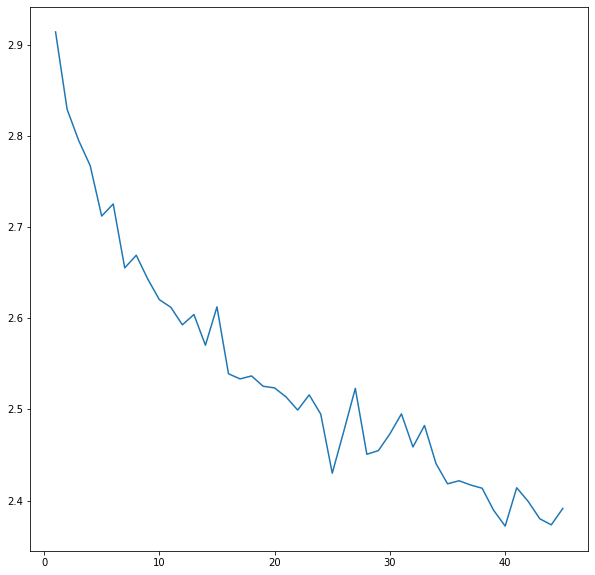

In [118]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [119]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 20.5755 - mae: 2.9300


[20.575454711914062, 2.9300200939178467]